In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Aumento de datos
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)  # Configuramos un 20% de los datos para validación

In [3]:
# Carga de datos de entrenamiento
train_generator = train_datagen.flow_from_directory(
    'frutas', 
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',  # usa 'categorical' para múltiples clases
    subset='training')  # Configuramos como datos de entrenamiento

Found 8000 images belonging to 5 classes.


In [4]:
# Carga de datos de validación
validation_generator = train_datagen.flow_from_directory(
    'frutas', 
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',  # usa 'categorical' para múltiples clases
    subset='validation')  # Configuramos como datos de validación

Found 2000 images belonging to 5 classes.


In [5]:
# Modelo con regularización
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(150, 150, 3)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(512, (3, 3)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))  # Capa de regularización
model.add(Dense(1024))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dense(train_generator.num_classes, activation='softmax'))

c:\Users\ordie\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\ordie\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [6]:
# Compilamos el modelo
opt = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [7]:
checkpoint = ModelCheckpoint('Modelo_de_Frutas.keras', save_best_only=True)
early_stopping = EarlyStopping(patience=5)


In [8]:
# Entrenamos el modelo
history = model.fit(train_generator, epochs=50, validation_data=validation_generator, callbacks=[checkpoint, early_stopping])

Epoch 1/30


c:\Users\ordie\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 346s 1s/step - accuracy: 0.4319 - loss: 1.9074 - val_accuracy: 0.2020 - val_loss: 2.2756
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 343s 1s/step - accuracy: 0.5489 - loss: 1.1802 - val_accuracy: 0.3845 - val_loss: 1.6052
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 337s 1s/step - accuracy: 0.6013 - loss: 1.0248 - val_accuracy: 0.5285 - val_loss: 1.2611
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 340s 1s/step - accuracy: 0.6315 - loss: 0.9469 - val_accuracy: 0.5990 - val_loss: 1.0655
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 340s 1s/step - accuracy: 0.6552 - loss: 0.8977 - val_accuracy: 0.5760 - val_loss: 1.1453
Epoch 6/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 339s 1s/step - accuracy: 0.6530 - loss: 0.8869 - val_accuracy: 0.5960 - val_loss: 1.0902
Epoch 7/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 338s 1s/step - accuracy: 0.6759 - loss: 0.8568 - val_accuracy: 0.5770 - val_loss: 1.1529
Epoch 8/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 338s 1s/step - accuracy: 0.6817 - loss: 0.8330 - val_accuracy: 0.628

In [9]:
# Evaluación del modelo
loss, accuracy = model.evaluate(validation_generator)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 237ms/step - accuracy: 0.7344 - loss: 0.7650
Loss: 0.71904057264328
Accuracy: 0.7490000128746033


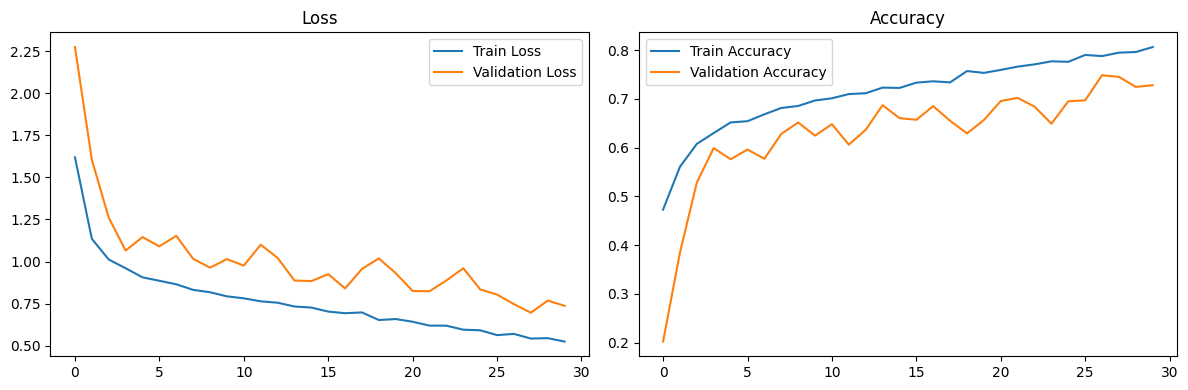

In [10]:
# Graficamos la curva de aprendizaje
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
# Obtenemos las predicciones del modelo
predictions = model.predict(validation_generator)
y_pred = np.argmax(predictions, axis=1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 236ms/step


In [12]:
# Obtenemos las etiquetas reales
y_true = validation_generator.classes

In [13]:
# Creamos la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

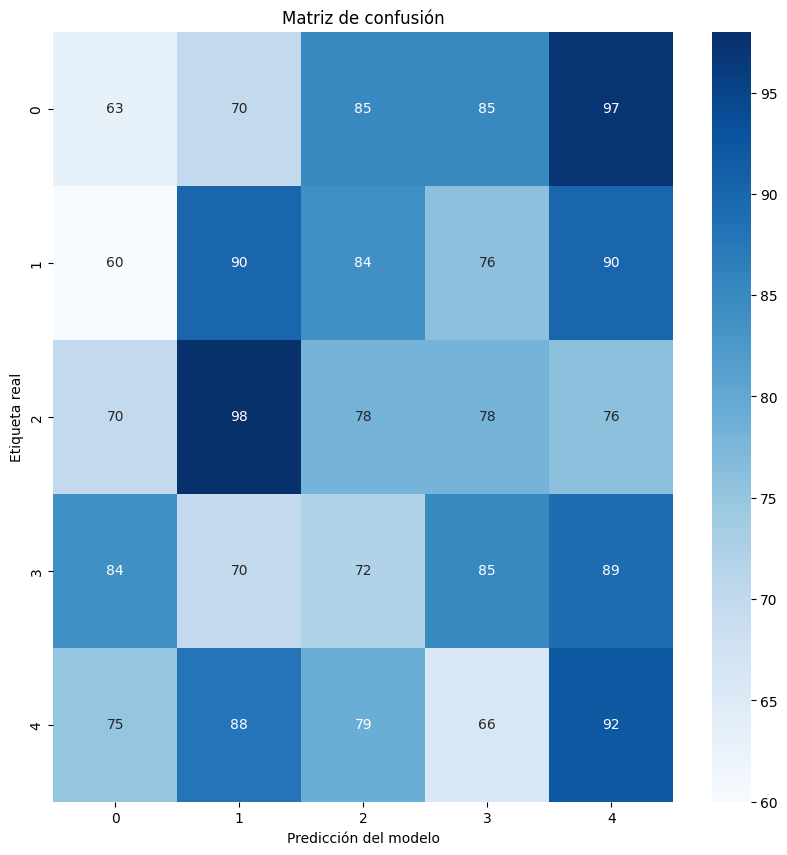

In [14]:
# Graficamos la matriz de confusión
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de confusión')
plt.ylabel('Etiqueta real')
plt.xlabel('Predicción del modelo')
plt.show()


# Matreiz no de multiclase, hacerlo de una clase, 5 matrices 

In [2]:
#Guardamos el modelo
model.save('Modelo_de_Frutas_30_epochs.h5')

NameError: name 'model' is not defined